___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

## INTRODUÇÃO

    A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
    A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
    Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')


Esperamos trabalhar no diretório
C:\Users\Augusto\Desktop\DP Ciência dos Dados\Projeto3


### BASE DE DADOS

In [3]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5402,Volkswagen,Golf GTI,2016,premium unleaded (recommended),220.0,4.0,MANUAL,front wheel drive,2.0,"Hatchback,Performance",Compact,2dr Hatchback,34,25,873,29520
2018,Plymouth,Breeze,1998,regular unleaded,132.0,4.0,MANUAL,front wheel drive,4.0,NaN,Midsize,Sedan,33,23,535,2000
11591,Volvo,XC60,2016,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,31,23,870,36600
1457,Bentley,Arnage,2008,premium unleaded (required),450.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Sedan,15,10,520,221990
9784,Chevrolet,Sonic,2017,regular unleaded,138.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,34,24,1385,18170


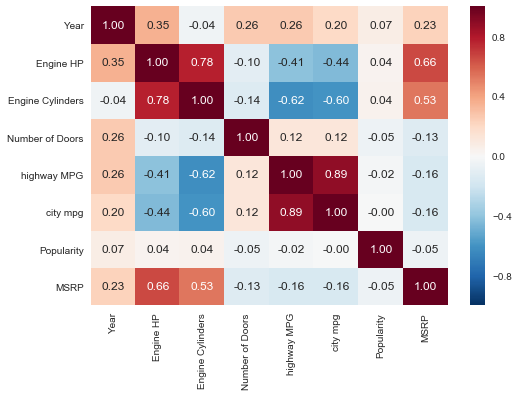

In [4]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

In [5]:
data = data.loc[:,['Year','Engine HP','Engine Cylinders','MSRP']]
print(data.MSRP.describe())
print()
print(data.head())

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

       Year  Engine HP  Engine Cylinders    MSRP
5402   2016      220.0               4.0   29520
2018   1998      132.0               4.0    2000
11591  2016      240.0               4.0   36600
1457   2008      450.0               8.0  221990
9784   2017      138.0               4.0   18170


In [6]:
data.head()

,Year,Engine HP,Engine Cylinders,MSRP
5402,2016,220.0,4.0,29520
2018,1998,132.0,4.0,2000
11591,2016,240.0,4.0,36600
1457,2008,450.0,8.0,221990
9784,2017,138.0,4.0,18170


### ANÁLISE DESCRITIVA

In [7]:
data.MSRP.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

In [8]:
faixa = range(5000,80000,3000)
price = pd.cut(data.MSRP, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.299081
(8000, 11000]      0.224311
(11000, 14000]     0.822474
(14000, 17000]     4.411451
(17000, 20000]     5.981628
(20000, 23000]     9.346294
(23000, 26000]    11.130100
(26000, 29000]    10.585345
(29000, 32000]    10.745567
(32000, 35000]     8.673360
(35000, 38000]     7.562487
(38000, 41000]     6.163213
(41000, 44000]     5.351421
(44000, 47000]     4.026917
(47000, 50000]     3.375347
(50000, 53000]     2.542192
(53000, 56000]     1.997436
(56000, 59000]     1.228370
(59000, 62000]     1.367229
(62000, 65000]     1.452681
(65000, 68000]     0.950652
(68000, 71000]     0.737022
(71000, 74000]     0.437941
(74000, 77000]     0.587481
Name: MSRP, dtype: float64

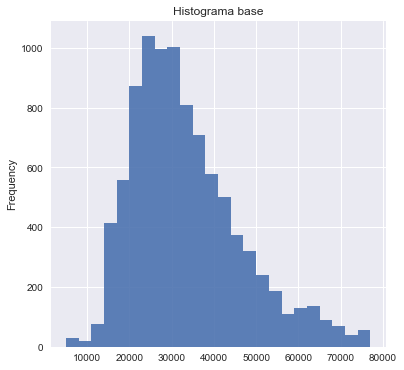

In [9]:
plot = data.MSRP.plot.hist(bins=faixa,title='Histograma base', figsize=(6, 6), alpha=0.9)
plt.show()

In [20]:
print(data['Engine Cylinders'].value_counts())
print()
print(data['Engine Cylinders'].describe())

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

count    11884.000000
mean         5.628829
std          1.780559
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64


In [16]:
#criando variável qualitativa
data.loc[(data['Engine Cylinders']>0) & (data['Engine Cylinders']<2),"Número de Cilindros"] = "Fraco"
data.loc[(data['Engine Cylinders']>=2) & (data['Engine Cylinders']<=4),"Número de Cilindros"] = "Médio"
data.loc[(data['Engine Cylinders']>=6) & (data['Engine Cylinders']<8),"Número de Cilindros"] = "Forte"
data.loc[(data['Engine Cylinders']>=8) & (data['Engine Cylinders']<=12),"Número de Cilindros"] = "Muito Forte"

In [15]:
data

,Year,Engine HP,Engine Cylinders,MSRP,Número de Cilindros
5402,2016,220.0,4.0,29520,Médio
2018,1998,132.0,4.0,2000,Médio
11591,2016,240.0,4.0,36600,Médio
1457,2008,450.0,8.0,221990,Forte
9784,2017,138.0,4.0,18170,Médio
3383,2010,244.0,4.0,33035,Médio
1593,2017,200.0,4.0,38700,Médio
2691,2016,375.0,4.0,49500,Médio
2165,2012,158.0,4.0,18765,Médio
5244,2014,348.0,6.0,32150,Forte


___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)